문제1 ] 서울 지역(구)의 경도와 위도 정보를 사용하여, 임의로 입력된 지역(동)을 강동, 강서, 강남, 강북으로 분류 분석을 수행합니다.

[데이터 셋 정보 ]
district: 행정구역 (서초구, 송파구, 용산구 등, 서울의 단위 지역 분류입니다)
dong: 구(district)보다 작은 행정구역 (대치동, 도곡동, 암사동 등, 서울의 소단위 분류입니다)
longitude: 경도
latitude: 위도
label: 한강 기준으로 동,서,남,북으로 구분한 지역 명칭
district_dict_list = [
{'district': 'Gangseo-gu', 'latitude': 37.551000, 'longitude': 126.849500, 'label':'Gangseo'},
{'district': 'Yangcheon-gu', 'latitude': 37.52424, 'longitude': 126.855396, 'label':'Gangseo'},
{'district': 'Guro-gu', 'latitude': 37.4954, 'longitude': 126.8874, 'label':'Gangseo'},
{'district': 'Geumcheon-gu', 'latitude': 37.4519, 'longitude': 126.9020, 'label':'Gangseo'},
{'district': 'Mapo-gu', 'latitude': 37.560229, 'longitude': 126.908728, 'label':'Gangseo'},

{'district': 'Gwanak-gu', 'latitude': 37.487517, 'longitude': 126.915065, 'label':'Gangnam'},
{'district': 'Dongjak-gu', 'latitude': 37.5124, 'longitude': 126.9393, 'label':'Gangnam'},
{'district': 'Seocho-gu', 'latitude': 37.4837, 'longitude': 127.0324, 'label':'Gangnam'},
{'district': 'Gangnam-gu', 'latitude': 37.5172, 'longitude': 127.0473, 'label':'Gangnam'},
{'district': 'Songpa-gu', 'latitude': 37.503510, 'longitude': 127.117898, 'label':'Gangnam'},

{'district': 'Yongsan-gu', 'latitude': 37.532561, 'longitude': 127.008605, 'label':'Gangbuk'},
{'district': 'Jongro-gu', 'latitude': 37.5730, 'longitude': 126.9794, 'label':'Gangbuk'},
{'district': 'Seongbuk-gu', 'latitude': 37.603979, 'longitude': 127.056344, 'label':'Gangbuk'},
{'district': 'Nowon-gu', 'latitude': 37.6542, 'longitude': 127.0568, 'label':'Gangbuk'},
{'district': 'Dobong-gu', 'latitude': 37.6688, 'longitude': 127.0471, 'label':'Gangbuk'},

{'district': 'Seongdong-gu', 'latitude': 37.557340, 'longitude': 127.041667, 'label':'Gangdong'},
{'district': 'Dongdaemun-gu', 'latitude': 37.575759, 'longitude': 127.025288, 'label':'Gangdong'},
{'district': 'Gwangjin-gu', 'latitude': 37.557562, 'longitude': 127.083467, 'label':'Gangdong'},
{'district': 'Gangdong-gu', 'latitude': 37.554194, 'longitude': 127.151405, 'label':'Gangdong'},
{'district': 'Jungrang-gu', 'latitude': 37.593684, 'longitude': 127.090384, 'label':'Gangdong'}
]
[분석 수행에 포함될 내용]

In [3]:
district_dict_list = [
{'district': 'Gangseo-gu', 'latitude': 37.551000, 'longitude': 126.849500, 'label':'Gangseo'},
{'district': 'Yangcheon-gu', 'latitude': 37.52424, 'longitude': 126.855396, 'label':'Gangseo'},
{'district': 'Guro-gu', 'latitude': 37.4954, 'longitude': 126.8874, 'label':'Gangseo'},
{'district': 'Geumcheon-gu', 'latitude': 37.4519, 'longitude': 126.9020, 'label':'Gangseo'},
{'district': 'Mapo-gu', 'latitude': 37.560229, 'longitude': 126.908728, 'label':'Gangseo'},

{'district': 'Gwanak-gu', 'latitude': 37.487517, 'longitude': 126.915065, 'label':'Gangnam'},
{'district': 'Dongjak-gu', 'latitude': 37.5124, 'longitude': 126.9393, 'label':'Gangnam'},
{'district': 'Seocho-gu', 'latitude': 37.4837, 'longitude': 127.0324, 'label':'Gangnam'},
{'district': 'Gangnam-gu', 'latitude': 37.5172, 'longitude': 127.0473, 'label':'Gangnam'},
{'district': 'Songpa-gu', 'latitude': 37.503510, 'longitude': 127.117898, 'label':'Gangnam'},

{'district': 'Yongsan-gu', 'latitude': 37.532561, 'longitude': 127.008605, 'label':'Gangbuk'},
{'district': 'Jongro-gu', 'latitude': 37.5730, 'longitude': 126.9794, 'label':'Gangbuk'},
{'district': 'Seongbuk-gu', 'latitude': 37.603979, 'longitude': 127.056344, 'label':'Gangbuk'},
{'district': 'Nowon-gu', 'latitude': 37.6542, 'longitude': 127.0568, 'label':'Gangbuk'},
{'district': 'Dobong-gu', 'latitude': 37.6688, 'longitude': 127.0471, 'label':'Gangbuk'},

{'district': 'Seongdong-gu', 'latitude': 37.557340, 'longitude': 127.041667, 'label':'Gangdong'},
{'district': 'Dongdaemun-gu', 'latitude': 37.575759, 'longitude': 127.025288, 'label':'Gangdong'},
{'district': 'Gwangjin-gu', 'latitude': 37.557562, 'longitude': 127.083467, 'label':'Gangdong'},
{'district': 'Gangdong-gu', 'latitude': 37.554194, 'longitude': 127.151405, 'label':'Gangdong'},
{'district': 'Jungrang-gu', 'latitude': 37.593684, 'longitude': 127.090384, 'label':'Gangdong'}
]

In [4]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import  VotingClassifier

A. 특성 (위도 경도) 과 클래스 (동,서,남,북으로 구분한 지역 명칭)를 분리

In [5]:
import pandas as pd
import random
http://localhost:8888/notebooks/02_DataType_DataStruc.ipynb
# 랜덤으로 섞어 주기 
random.shuffle(district_dict_list)

df = pd.DataFrame(district_dict_list)
df_X = df[['latitude', 'longitude']]
df_Y = df[['label']]

B. train과 test 데이터 분리

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y)

C. 의사결정트리 분류 분석 수행

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

tree_clf =   DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)


In [24]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=0) # 결정 트리 분류기 객체 생성
model = tree_clf.fit(X_train,y_train) # 모델 훈련

model.predict(X_train) # 샘플 데이터의 클래스 예측
model.predict_proba(X_test) # 세 개의 클래스에 대한 예측 확률을 확인

# 엔트로피를 사용해 결정 트리 분류기를 훈련합니다.
decisiontree_entropy = DecisionTreeClassifier( criterion='entropy', random_state=0)
model_entropy = decisiontree_entropy.fit(X_train, y_train) # 모델 훈련

In [30]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score

# rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16,  n_jobs=-1, random_state=42)
# rnd_clf.fit(X_train, y_train)
# y_pred_rf = rnd_clf.predict(X_test)
# print('Accuracy=', accuracy_score(y_test, y_pred_rf ))


C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Accuracy= 1.0


D. 의사결정트리 시각화 

In [20]:
import os 
os.environ["PATH"] += os.pathsep +'C:/program Files (x86)/Graphviz2.38/bin/'

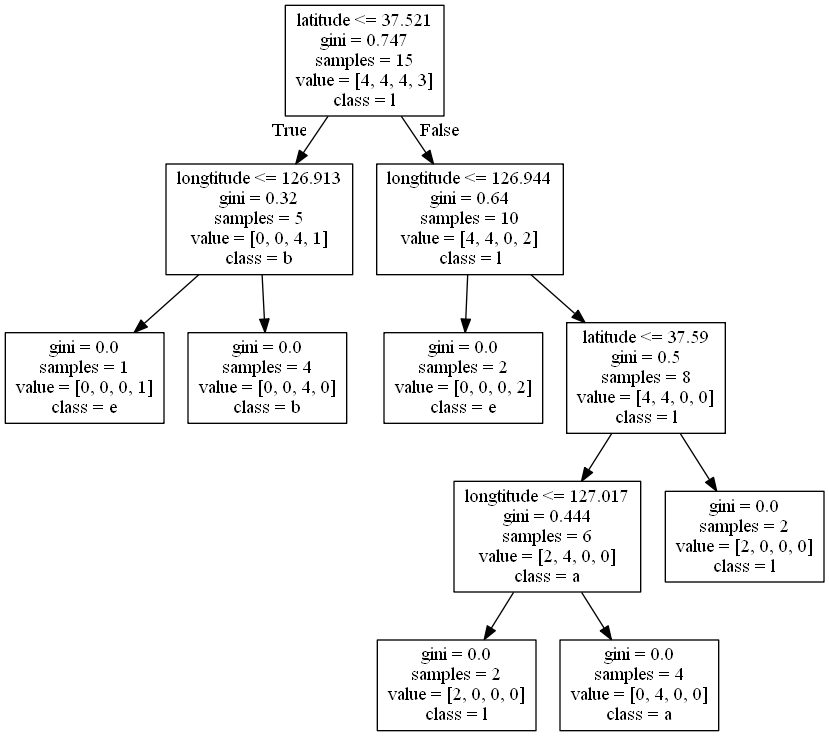

In [21]:
import pydotplus
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from IPython.display import Image
from sklearn import tree

iris = datasets.load_iris() # 데이터 로드
features = iris.data
target = iris.target

decisiontree = DecisionTreeClassifier(random_state=0) # 결정 트리 분류기를 만듭니다.

model = tree_clf.fit(X_train, y_train) # 모델 훈련
dot_data = tree.export_graphviz(tree_clf,
                                out_file=None,
                                feature_names=['latitude','longtitude'],
                                class_names='label') # DOT 데이터를 만듭니다

graph = pydotplus.graph_from_dot_data(dot_data) # 그래프를 그립니다.
Image(graph.create_png()) # 그래프 출력
# graph.write_pdf("gu.pdf") # PDF를 만듭니다.
# graph.write_png("gu.png") # PNG 파일을 만듭니다

E. 모델 예측 정확도(accuracy)를 확인

In [25]:
print('Accuracy=', accuracy_score(y_test, y_pred_tree))

Accuracy= 0.8


문제 2]
사이킷런의 손글씨 데이터를 로드하여 10번의 교차검증을 수행하여
RandomForest 분류분석과 DecisionTree분류분석의 교차 검증 평균 정확도를 비교할 수 있도록 라인 차트로 시각화하시오

A. 사이킷런의 손글씨 데이터를 로드
B. 교차 검증을 10번 수행하여, 10번의 교차 검증 평균 정확도 반환하는 함수를 정의하시오 
def cross_validation(classifier,features, labels):
.....
C. 교차 검증 평균 정확도를 반환하는 함수에 각각 RandomForest 분류모델객체, DecisionTree분류 모델 객체를 전달하여 실행시킨 결과를 변수에 저장
D. 랜덤포레스트와 의사결정트리의 정확도를 비교해주는 라인 차트 출력

In [10]:
# A. 사이킷런의 손글씨 데이터를 로드

%matplotlib inline
import matplotlib.pyplot as plt # 시각화를 위한 맷플롯립
from sklearn.datasets import load_digits
digits = load_digits() # 1,979개의 이미지 데이터 로드

In [13]:
# B. 교차 검증을 10번 수행하여, 10번의 교차 검증 평균 정확도 반환하는 함수를 
# 정의하시오
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target == 9, random_state=42)

from sklearn.svm import SVC
cross_val_score(SVC(gamma='auto'), X_train, y_train, cv=3)

array([0.90200445, 0.90200445, 0.90200445])

In [24]:
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

standardizer = StandardScaler()
logit = LogisticRegression()
pipeline = make_pipeline(standardizer, logit)
rfk = RepeatedKFold(n_splits=10, n_repeats=5, random_state=42)

cv_results = cross_val_score( pipeline,# 파이프라인
                            digits.data, # 특성 행렬
                            digits.target, # 타깃 벡터
                            cv=rfk, # 교차 검증 기법
                            scoring="accuracy", # 평가 지표
                            n_jobs=-1) # 모든 CPU 코어 사용
cv_results.mean()

0.9695065176908755

In [31]:
from sklearn.model_selection import StratifiedKFold

def cross_validation(classifier,features, labels):
    skf = StratifiedKFold(n_splits=10, shuffle= True, random_state=0)
    score = cross_val_score(classifier, features, labels, cv=skf)
    score_mean = score.mean()
    return score,score_mean

x_data = digits.data
y_data = digits.target

logreg = LogisticRegression()
cross_validation(logreg,x_data,y_data)

C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/module

(array([0.96666667, 0.96111111, 0.96111111, 0.95555556, 0.95      ,
        0.96111111, 0.98333333, 0.96089385, 0.97765363, 0.98324022]),
 0.9660676598386095)

In [32]:
# C. 교차 검증 평균 정확도를 반환하는 함수에 각각 RandomForest 분류모델객체, 
# DecisionTree분류 모델 객체를 전달하여 실행시킨 결과를 변수에 저장

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

model1 = RandomForestClassifier()
RF_score,RF_mean = cross_validation(model1,x_data,y_data)

model2 = DecisionTreeClassifier()
DT_score, DT_mean = cross_validation(model2,x_data,y_data)

print("RandomForest 분류모델객체:{}".format(RF_mean))
print("DecisionTree 분류모델객체:{}".format(DT_mean))

RandomForest 분류모델객체:0.9744009931719428
DecisionTree 분류모델객체:0.8469553072625698


In [ ]:
# D. 랜덤포레스트와 의사결정트리의 정확도를 비교해주는 라인 차트 출력

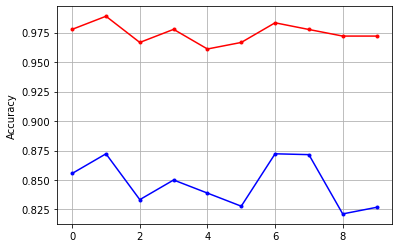

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(RF_score, marker='.', c="red", label='RF')
plt.plot(DT_score, marker='.', c="blue", label='DT')
plt.grid()
plt.ylabel('Accuracy')
plt.show() 

문제 3 ]
MNIST 손글씨 데이터 셋 (28 × 28 = 784개의 속성)으로부터 0~9까지 10개 클래스 중 하나를 맞히는 분류 문제
A. 가로 28, 세로 28의 2차원 배열을 784개의 1차원 배열로 변환
B. 0~255 사이의 값으로 이루어진 값을 0~1 사이의 값으로 값으로 정규화(normalization) 하기 위해 특성데이터를 255로 나눔.
C. Y_class를 원-핫 인코딩 변환
D. 입력층으로부터 은닉층으로의 출력 뉴런스 512개 , 은닉층은 1층 구성, 출력층 출력 뉴런스 10개 , 입력층과 은닉층 활성화 함수는 relu, 출력층 활성화 함수는 softmax로 모델 생성
E. 모델의 실행에 앞서 모델의 성과를 저장하고 모델의 최적화 단계에서 학습을 자동 중단하게끔 설정합니다.
F. 학습은 샘플 200개를 모두 30번 실행하게끔 설정합니다. 
G. 테스트셋으로 최종 모델의 성과를 측정하여 정확도 값을 출력합니다. 
H. 테스트셋의 오차와 학습셋의 오차를 비교할 수 있는 그래프로 출력합니다

In [1]:
import numpy as np
import tensorflow as tf
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint,EarlyStopping

import matplotlib.pyplot as plt
import numpy
import os
import tensorflow as tf
# seed 값 설정
seed = 0
numpy.random.seed(seed)
#tf.set_random_seed(seed)

# MNIST 데이터 불러오기
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()

Using TensorFlow backend.


In [2]:
# A. 가로 28, 세로 28의 2차원 배열을 784개의 1차원 배열로 변환
X_train=X_train.reshape(X_train.shape[0], 784).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32')

In [3]:
# B. 0~255 사이의 값으로 이루어진 값을 0~1 사이의 값으로 값으로 정규화(normalization)
# 하기 위해 특성데이터를 255로 나눔.
X_train =X_train/ 255
X_test = X_test/ 255

In [4]:
from keras.utils import np_utils

# C. Y_class를 원-핫 인코딩 변환
Y_train = np_utils.to_categorical(Y_train, 10)
Y_test = np_utils.to_categorical(Y_test, 10)
# 모델 프레임 설정

In [5]:
# from keras.utils.visualize_util import to_graph
# D. 입력층으로부터 은닉층으로의 출력 뉴런스 512개 ,
# 은닉층은 1층 구성, 출력층 출력 뉴런스 10개 , 
# 입력층과 은닉층 활성화 함수는 relu, 출력층 활성화 함수는 softmax로 모델 생성
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [6]:
# E. 모델의 실행에 앞서 모델의 성과를 저장하고 모델의 최적화 단계에서 학습을 
# 자동 중단하게끔 설정합니다.
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [7]:
# F. 학습은 샘플 200개를 모두 30번 실행하게끔 설정합니다. 
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])


Epoch 00001: val_loss improved from inf to 0.15347, saving model to ./model/01-0.1535.hdf5

Epoch 00002: val_loss improved from 0.15347 to 0.10388, saving model to ./model/02-0.1039.hdf5

Epoch 00003: val_loss improved from 0.10388 to 0.08344, saving model to ./model/03-0.0834.hdf5

Epoch 00004: val_loss improved from 0.08344 to 0.07757, saving model to ./model/04-0.0776.hdf5

Epoch 00005: val_loss improved from 0.07757 to 0.06760, saving model to ./model/05-0.0676.hdf5

Epoch 00006: val_loss improved from 0.06760 to 0.06232, saving model to ./model/06-0.0623.hdf5

Epoch 00007: val_loss did not improve from 0.06232

Epoch 00008: val_loss improved from 0.06232 to 0.06026, saving model to ./model/08-0.0603.hdf5

Epoch 00009: val_loss improved from 0.06026 to 0.05816, saving model to ./model/09-0.0582.hdf5

Epoch 00010: val_loss did not improve from 0.05816

Epoch 00011: val_loss did not improve from 0.05816

Epoch 00012: val_loss did not improve from 0.05816

Epoch 00013: val_loss did n

In [8]:
# G. 테스트셋으로 최종 모델의 성과를 측정하여 정확도 값을 출력합니다.
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

10000/10000 [==============================] - 0s 37us/step

 Test Accuracy: 0.9816


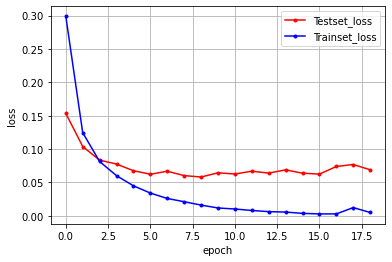

In [9]:
# H. 테스트셋의 오차와 학습셋의 오차를 비교할 수 있는 그래프로 출력합니다

# 테스트 셋의 오차
y_vloss = history.history['val_loss']
# 학습셋의 오차
y_loss = history.history['loss']
# 그래프로 표현
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')
# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
# plt.axis([0, 20, 0, 0.35])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show() 